In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Let's get the data from the URL: http://yann.lecun.com/exdb/mnist/
import hashlib, os, requests, gzip
# first creating a path 'DATA/MNIST' in local directory where the datasets will be populated
path='/content/DATA/MNIST'
def fetch(url):
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

# fetching and reshaping data for an MLP input
train_images = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 784))
train_labels = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
test_images = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 784))
test_labels = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]


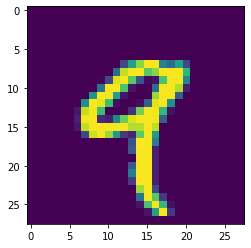

In [48]:
# Let's see one of the train images from the dataset
image1 = np.asarray(train_images).reshape(-1, 28, 28)[4]
plt.imshow(image1)
plt.show()

In [49]:
# normalizing data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# converting labels to a one-hot vector
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [50]:
# defining network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

MLP = Sequential()
MLP.add(InputLayer(input_shape=(784, ))) # input layer
MLP.add(Dense(256, activation='relu')) # hidden layer 1
MLP.add(Dense(256, activation='relu')) # hidden layer 2
MLP.add(Dense(10, activation='softmax')) # output layer

MLP.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [51]:
# optimization
MLP.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [52]:
# training (fitting) the model
model = MLP.fit(train_images, train_labels, validation_data=(test_images, test_labels),
        epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2602 - accuracy: 0.9236 - val_loss: 0.1206 - val_accuracy: 0.9618
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0983 - accuracy: 0.9690 - val_loss: 0.0990 - val_accuracy: 0.9682
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.0813 - val_accuracy: 0.9746
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0720 - val_accuracy: 0.9788
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0773 - val_accuracy: 0.9753
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0751 - val_accuracy: 0.9777
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0913 - val_accuracy: 0.9742
Epoc

In [53]:
# evaluating performance
test_loss, test_acc = MLP.evaluate(test_images, test_labels,
                                   batch_size=128,
                                   verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.12084240466356277
Test accuracy: 0.9776999950408936


array([[0.02914334, 0.03788447, 0.08828844, 0.06856566, 0.05235583,
        0.4589955 , 0.09320337, 0.05499397, 0.09279097, 0.02377848]],
      dtype=float32)

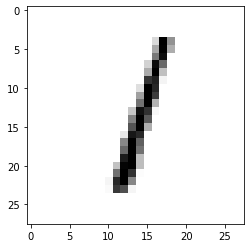

In [54]:
# making a prediction
digit = test_images.reshape(-1, 28, 28)[2]
plt.imshow(digit, cmap="binary")
digit = np.reshape(digit, (-1, 784))
digit = digit.astype('float32') / 255

MLP.predict(digit, verbose=0)


Analysis of the model:

• What is the shape of the training samples. What kind of shape does your MLP expects for the input samples.


In [55]:
train_images.shape

(60000, 784)

In [ ]:
# Input shape expected by MLP: (784, ) where 784 is the number of nodes in the input layer

• What is the splitting ratio of the training and test sets.


In [56]:
splitRatio = len(train_images)/len(test_images)
splitRatio

6.0

• How is every layer of MLP represented mathematically. How many layers are present in your model, and how many neurons are present in different layers.


In [ ]:
# Hidden layer 1: 256 neurons, ReLU activation
# Hidden layer 2: 256 neurons, ReLU activation
# Output layer  : 10  neurons, Softmax activation

• What kind of non-linear activation function is used. Write down its mathematical formula.


In [ ]:
# No activation function is needed for the input layer.
# We need to use a non-linear activation function in the hidden layers. This is because handwritten digits classification is a non-linear task. 
# Without a non-linear activation function in the hidden layers, our MLP model will not learn any non-linear relationship in the data. 
# Therefore, we use the ReLU activation function in both hidden layers.
# In the output layer, we use the 'Softmax' activation function. It is the only option for a multiclass classification problem. 
# The output layer has 10 nodes that correspond to the 10 labels (classes). The Softmax function calculates the probability value of an event 
# (class) over K different events (classes). The classes are mutually exclusive; if we sum the probability values of each class, we get 1.0.

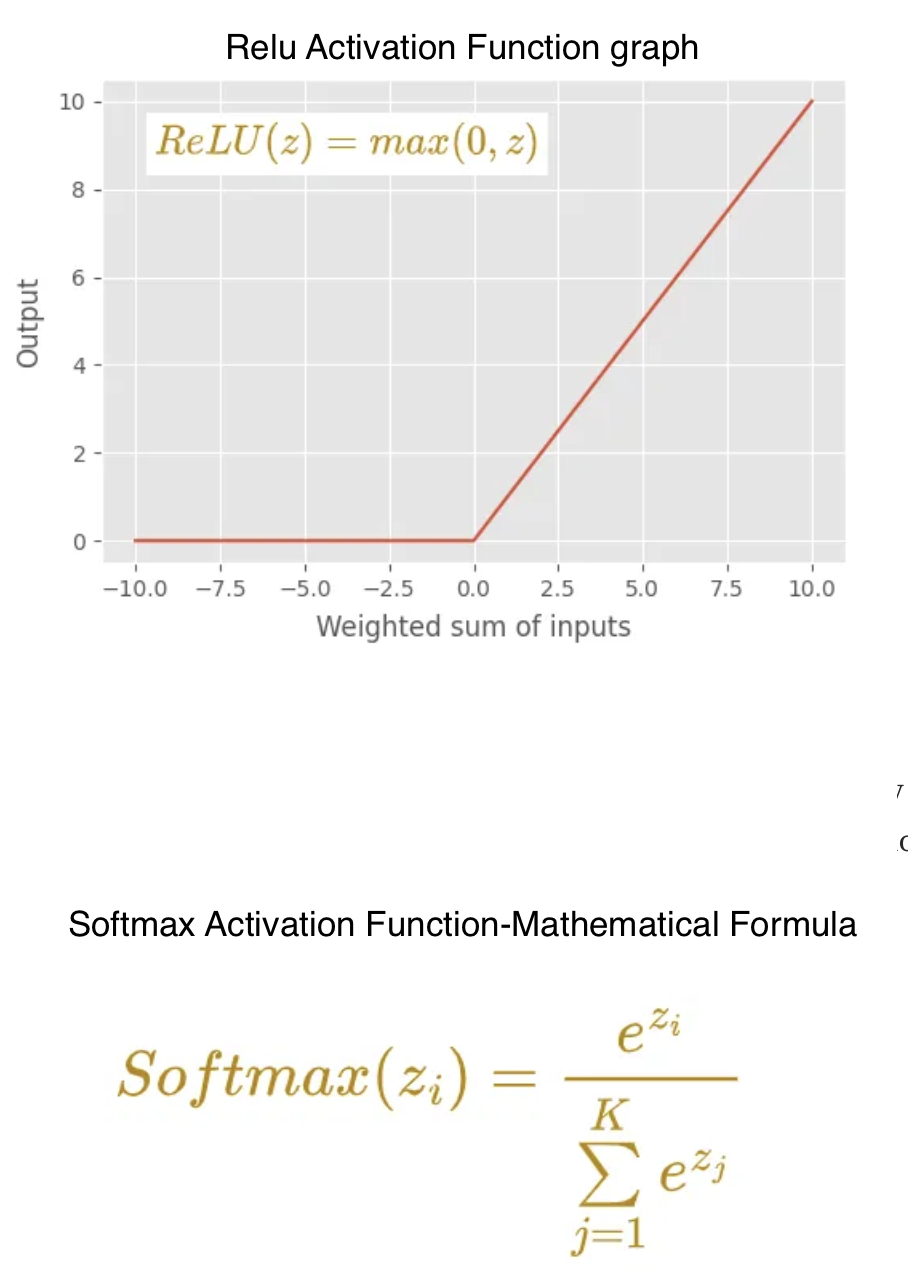

In [ ]:
from IPython.display import Image
Image('activationFunctions.png', width=300)

# Mathematically, ReLu is given as: 𝒇𝒙 = 𝒎𝒂𝒙(𝒂,𝒙)
# below we can see the ReLu function graph and softmax function mathematical formula

• What is the loss function used. Write down its mathematical formula.


In [ ]:
# The loss function used is 'Categorical Cross-entropy' because our MLP model is a multiclass classification model.
# For Binary classification and y ∈ (0, 1) and yD = 0 or 1 , a cross-entropy loss function written as:
# Div(yD, y) = -yD*(log(y)) - (1-yD)*log(1-y)
# With a derivative;  Div(yD, y)/dy = -1/y; if yD=1 and 1/(1-y) if yD=0

• How are parameters of the model updated after each mini-batch. What kind of optimization is used in training.

In [ ]:
# In one epoch, the fit() method processes 469 steps and the model parameters will be updated 469 times in each epoch
# of optimization. In each epoch, the algorithm takes the first 128 training instances and updates the model 
# parameters. Then, it takes the next 128 training instances and updates the model parameters. The algorithm will 
# do this process until 469 steps complete in each epoch.
# Here, we use the 'Adam' optimizer for training the model

• Plot the loss and accuracy plots vs number of epochs for the training and testing sets.

In [57]:
# loss and accuracy values at the end of each epoch for test and train sets
loss=model.history['loss']
accuracy = model.history['accuracy']
epochs = model.epoch
val_loss=model.history['val_loss']
val_accuracy = model.history['val_accuracy']

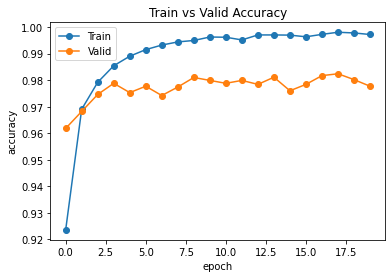

In [58]:
#plot accuracy
plt.plot(accuracy,'-o')
plt.plot(val_accuracy,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')

plt.show()

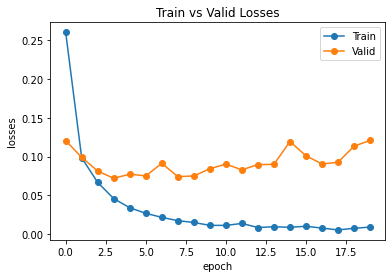

In [59]:
#plot losses
plt.plot(loss,'-o')
plt.plot(val_loss,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

In [ ]:
# Observations: from the above plots we can see that the loss decreases while the accuracy gradually increases with
# the increasing epoch values for the training set while for the valisation set, accuracy initially increases then
# stays almost same throughout and similar pattern exists for the validation loss as well.